In [1]:
# A função de semente é usada para salvar o estado de uma função aleatória, 
# para que possa gerar os mesmos números aleatórios em várias execuções do 
# código na mesma máquina ou em máquinas diferentes (para um valor de semente específico)

import random 
random.seed(12) 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns


#2. Pré-preparação dos dados


# Ler os dados
df =  pd.read_excel('df_reclamacoes.xlsx')
df.keys()

Index(['id', 'titulo', 'descricao', 'data', 'local', 'link', 'categoria'], dtype='object')

In [3]:
#df = df[:600] # <--- Limitando o conjunto de dados a 600 observações
df = df.drop(columns='link')
df.head(6)

,id,titulo,descricao,data,local,categoria
0,[' 155807431'],['13 dias para recuperar minha conta '],"['Esqueci a senha da minha conta do Icloud, e ...",['19/12/2022 às 19:06'],['São Paulo - SP'],atendimento
1,[' 156154747'],['15 dias para resetar uma senha'],['O meu iphone parou de funcionar do nada. A u...,['24/12/2022 às 11:48'],['Santos - SP'],sistema
2,[' 153345065'],['2a via nota fiscal IPhone 8 plus'],['Solicitei 2a via de um IPhone 8 plus Pedido ...,['14/11/2022 às 16:46'],['São Paulo - SP'],atendimento
3,[' 154602079'],['2 MacBooks PRO com o mesmo problema e indife...,"['Meu Mac veio com a bateria ""morta"", não carr...",['02/12/2022 às 12:09'],['Campinas - SP'],falha
4,[' 153016711'],['50 GB DO ICLOUD NÃO FOI LIBERADO'],['Comprei iphone 12 no site da pontofrio e no ...,['06/11/2022 às 16:09'],['Niterói - RJ'],atendimento
5,[' 155780385'],['6 meses de uso e a bateria do Apple watch ca...,['Comprei um apple watch series 3 na apple sto...,['19/12/2022 às 14:40'],['Macaé - RJ'],falha


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2046 entries, 0 to 2045
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         2046 non-null   object
 1   titulo     2046 non-null   object
 2   descricao  2046 non-null   object
 3   data       2046 non-null   object
 4   local      2046 non-null   object
 5   categoria  2046 non-null   object
dtypes: object(6)
memory usage: 96.0+ KB


In [5]:
# Transformação dos dados
df['sentencas'] = df['titulo'] + df['descricao']

df['sentencas'].head()


0    ['13 dias para recuperar minha conta ']['Esque...
1    ['15 dias para resetar uma senha']['O meu ipho...
2    ['2a via nota fiscal IPhone 8 plus']['Solicite...
3    ['2 MacBooks PRO com o mesmo problema e indife...
4    ['50 GB DO ICLOUD NÃO FOI LIBERADO']['Comprei ...
Name: sentencas, dtype: object

In [6]:
#Importa as bibliotecas para limpeza e tratamento do conjunto de dados

import re
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
nltk.download('punkt')
from nltk.corpus import stopwords
stop_words_pt = stopwords.words('portuguese')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Assis\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [171]:
# Imprime a lista de stopwords

print(stop_words_pt)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [7]:
# Aplica uma distribuição de Frequência para identificar os termos mais presentes em todo o conjunto de dados
# Utilizado para incluir selecionar palavras ou termos a serem adicionados à lista de stopwords

all_words = ''
all_words = ' '.join([word for word in df['sentencas'] ])
all_words = word_tokenize(all_words)
fd = FreqDist(all_words)

#fd.value_counts()
#fd.tabulate(80)

fd.most_common(20)

[(',', 17213),
 ('.', 9007),
 ('o', 8817),
 ("'", 8443),
 ('que', 8427),
 ('de', 8157),
 ('e', 8092),
 ('a', 7568),
 ('não', 4807),
 ('[', 4348),
 (']', 4347),
 ('um', 4019),
 ('com', 3550),
 ('do', 3549),
 ('para', 3158),
 ('da', 2935),
 ('em', 2479),
 ('no', 2363),
 ('Apple', 2262),
 ('meu', 2171)]

In [8]:
# Adiciona termos a lista stop_words, após identificá-las em uma contagem de frequência de palavras

stop_words_pt.append('apple')
stop_words_pt.append('n')
stop_words_pt.append('s')
stop_words_pt.append('m')
stop_words_pt.append('j')
stop_words_pt.append('t')
stop_words_pt.append('c')
stop_words_pt.append('r')
stop_words_pt.append('v')
stop_words_pt.append('h')

# Remove a stopword especificada
#stop_words.remove('n')

# Imprime a lista de stopwords
print(stop_words_pt)

['a', 'à', 'ao', 'aos', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'as', 'às', 'até', 'com', 'como', 'da', 'das', 'de', 'dela', 'delas', 'dele', 'deles', 'depois', 'do', 'dos', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'em', 'entre', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'esta', 'está', 'estamos', 'estão', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos', 'fui', 'há', 'haja', 'hajam', 'hajamos', 'hão', 'havemos', 'haver', 'hei', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvésse

In [9]:
# Define as funções para limpeza dos dados

def remove_punctuation(text):
    # Remove caracteres especiais e números
    text = re.sub('[^a-zA-Z]', ' ', text)
    
    # Transforma em minúsculas
    text = text.lower()
    
    words = text.split()
    
    # Junta as palavras novamente
    text = ' '.join(words)
    return text


def remove_stopwords(text):  
    # Remove stopwords
    words = text.split()
    words = [word for word in words if not word in stop_words_pt]
    
    # Junta as palavras novamente
    text = ' '.join(words)
    return text


def aplica_stemmer(text):  
    # Stemming
    stemmer = SnowballStemmer('portuguese')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    
    # Junta as palavras novamente
    text = ' '.join(words)
    return text


In [10]:
# Aplica as funções de limpeza

df['removed_punctuation'] = df['sentencas'].apply(remove_punctuation)
df['removed_stopwords'] = df['removed_punctuation'].apply(remove_stopwords)
df['aplicado_stemmer'] = df['removed_stopwords'].apply(aplica_stemmer)

In [11]:
df[['sentencas','aplicado_stemmer','categoria']].head(6)

,sentencas,aplicado_stemmer,categoria
0,['13 dias para recuperar minha conta ']['Esque...,dias recuper cont esquec senh cont icloud prec...,atendimento
1,['15 dias para resetar uma senha']['O meu ipho...,dias reset senh iphon par funcion nad unic for...,sistema
2,['2a via nota fiscal IPhone 8 plus']['Solicite...,via not fiscal iphon plus solicit via iphon pl...,atendimento
3,['2 MacBooks PRO com o mesmo problema e indife...,macbooks pro problem indiferen assist nci mac ...,falha
4,['50 GB DO ICLOUD NÃO FOI LIBERADO']['Comprei ...,gb icloud liber compr iphon sit pontofri an nc...,atendimento
5,['6 meses de uso e a bateria do Apple watch ca...,mes uso bat watch caiu metad compr watch seri ...,falha


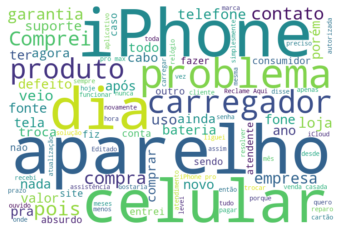

In [12]:
#import matplotlib.pylab as plt
#import matplotlib.pyplot as plt
from wordcloud import WordCloud

all_words = ''
all_words = ' '.join([word for word in df['sentencas'] ])
all_words = word_tokenize(all_words)

text = " ".join(all_words)
wc = WordCloud(
        width = 720, height = 480, 
        background_color = "white", 
        max_words = 100, stopwords = stop_words_pt
)

wc.generate(text)

plt.axis("off")
plt.imshow(wc, interpolation = "bilinear")

#Show the wordcloud
#plt.show()

In [13]:

# Palavras mais frequentes na categoria 'acessorio' 
all_words_acessorio = ''
all_words_acessorio = ' '.join([word for word in df[(df['categoria'] == 'acessorio')] ])
all_words_acessorio = word_tokenize(all_words_acessorio)

text_acessorio = " ".join(all_words_acessorio)
wc_acessorio = WordCloud(
        width = 720, height = 480, 
        background_color = "white", 
        max_words = 100, stopwords = stop_words_pt
)
    
    
# Palavras mais frequentes na categoria 'falha' 
all_words_falha = ''
all_words_falha = ' '.join([word for word in df[(df['categoria'] == 'falha')] ])
all_words_falha = word_tokenize(all_words_falha)

text_falha = " ".join(all_words_falha)
wc_falha = WordCloud(
        width = 720, height = 480, 
        background_color = "white", 
        max_words = 100, stopwords = stop_words_pt
)
    
# Palavras mais frequentes na categoria 'atendimento' 
all_words_atendimento = ''
all_words_atendimento = ' '.join([word for word in df[(df['categoria'] == 'atendimento')] ])
all_words_atendimento = word_tokenize(all_words_atendimento)

text_atendimento = " ".join(all_words_atendimento)
wc_atendimento = WordCloud(
        width = 720, height = 480, 
        background_color = "white", 
        max_words = 100, stopwords = stop_words_pt
)

# Palavras mais frequentes na categoria 'sistema' 
all_words_sistema = ''
all_words_sistema = ' '.join([word for word in df[(df['categoria'] == 'sistema')] ])
all_words_sistema = word_tokenize(all_words_sistema)

text_sistema = " ".join(all_words_sistema)
wc_sistema = WordCloud(
        width = 720, height = 480, 
        background_color = "white", 
        max_words = 100, stopwords = stop_words_pt
)



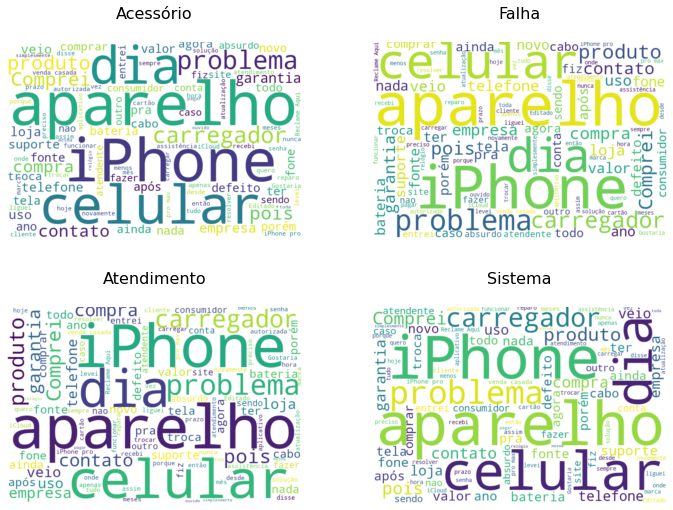

In [19]:
plt.figure(figsize = ((12, 8)))

plt.subplot(2, 2, 1)
wc_acessorio.generate(text)
plt.axis("off")
plt.imshow(wc_acessorio, interpolation = "bilinear")
plt.title("Acessório\n", fontsize = 16)

plt.subplot(2, 2, 2)
wc_falha.generate(text)
plt.axis("off")
plt.imshow(wc_falha, interpolation = "bilinear")
plt.title("Falha\n", fontsize = 16)

plt.subplot(2, 2, 3)
wc_atendimento.generate(text)
plt.axis("off")
plt.imshow(wc_atendimento, interpolation = "bilinear")
plt.title("Atendimento\n", fontsize = 16)

plt.subplot(2, 2, 4)
wc_sistema.generate(text)
plt.axis("off")
plt.imshow(wc_sistema, interpolation = "bilinear")
plt.title("Sistema\n", fontsize = 16)

#plt.suptitle("Categorias", fontsize = 20)
plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.35)
plt.show()

In [20]:
# Imprime a quantidade de observações por categoria

df['categoria'].value_counts()

acessorio      703
falha          663
atendimento    399
sistema        281
Name: categoria, dtype: int64

<AxesSubplot:>

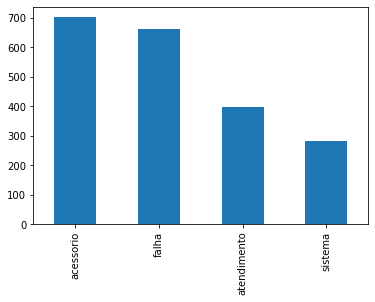

In [21]:
# Plot Distribution of Subject/Value Counts

df['categoria'].value_counts().plot(kind='bar')

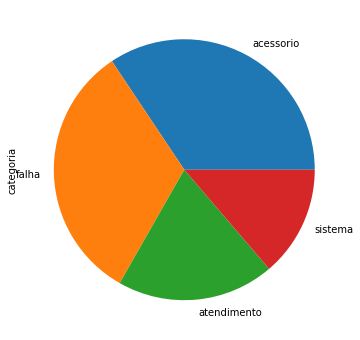

In [23]:
# Plot Distribution of Subject/Value Counts with Pie Chart

plt.figure(figsize=(10,6))
df['categoria'].value_counts().plot(kind='pie')
plt.show()

C:\Users\Assis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


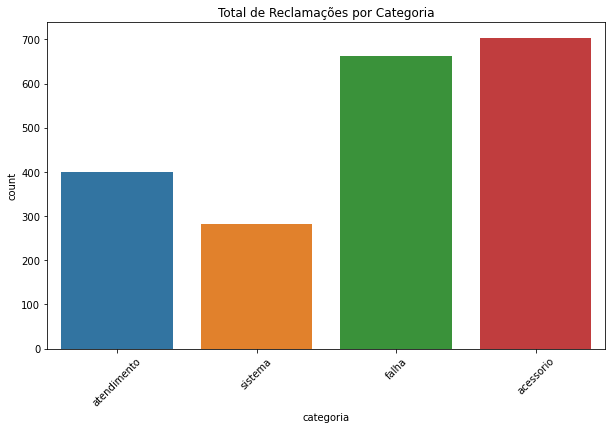

In [24]:
# Method 2: using seaborn

plt.figure(figsize=(10,6))
sns.countplot(df['categoria'])
plt.title("Total de Reclamações por Categoria")
plt.xticks(rotation=45)
plt.show()

C:\Users\Assis\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Distribuição das reclamações por categoria')

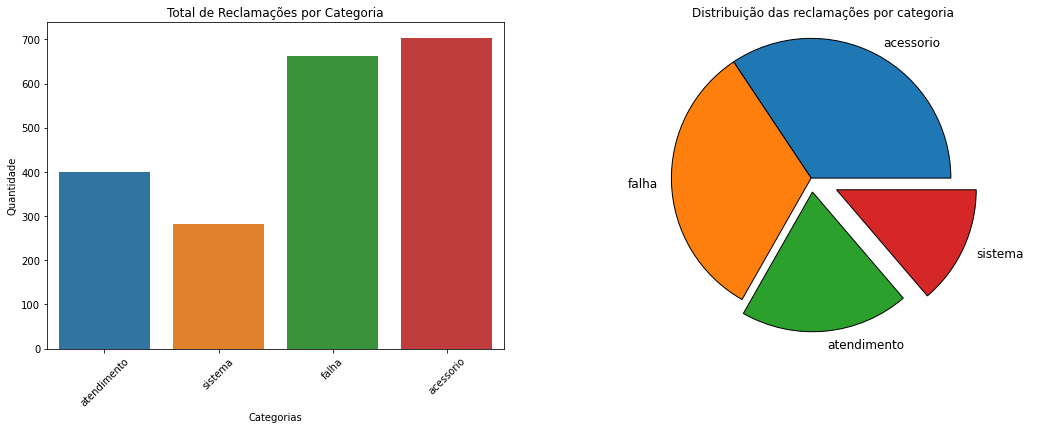

In [26]:
valores = df['categoria'].value_counts().values
categorias = df['categoria'].value_counts().index

plt.figure(figsize = (18, 6))

plt.subplot(1, 2, 1)
#plt.bar(categorias, valores, ec = "k", alpha = .6, color = "royalblue")

sns.countplot(df['categoria'])
plt.xticks(rotation=45)
plt.xlabel("Categorias")
plt.ylabel("Quantidade")
plt.title("Total de Reclamações por Categoria")

plt.subplot(1, 2, 2)
plt.pie(valores, 
        labels = list(categorias),
        #values = list(valores),
        labeldistance = 1.1,
        explode = [0, 0, .1, .2],
        wedgeprops = {"ec": "k"}, 
        textprops = {"fontsize": 12}, 
        )
plt.axis("equal")
plt.title("Distribuição das reclamações por categoria")


In [28]:
## Dividindo os dados para treinamento (train) e teste (test)

from sklearn.model_selection import train_test_split

## Conjunto de dados X e conjunto de rótulos y
X = df.aplicado_stemmer 
y = df.categoria

## Divide os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Text(0.5, 1.0, 'Dados de Teste')

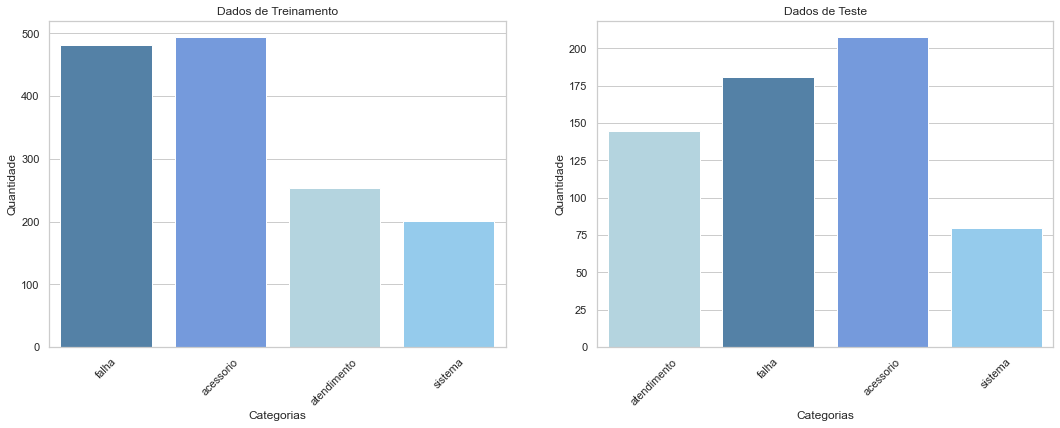

In [29]:
sns.set_theme(style="whitegrid")

plt.figure(figsize = (18, 6))

plt.subplot(1, 2, 1)
sns.countplot(x=y_train, 
              palette={"falha": "steelblue", "sistema": "lightskyblue", 
                       "acessorio": "cornflowerblue", "atendimento": "lightblue" })
plt.xticks(rotation=45)
plt.xlabel("Categorias")
plt.ylabel("Quantidade")
plt.title("Dados de Treinamento")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test, 
              palette={"falha": "steelblue", "sistema": "lightskyblue", 
                       "acessorio": "cornflowerblue", "atendimento": "lightblue" })
plt.xticks(rotation=45)
plt.xlabel("Categorias")
plt.ylabel("Quantidade")
plt.title("Dados de Teste")

In [30]:
y_train.value_counts()


acessorio      495
falha          482
atendimento    254
sistema        201
Name: categoria, dtype: int64

In [31]:
y_test.value_counts()

acessorio      208
falha          181
atendimento    145
sistema         80
Name: categoria, dtype: int64

In [32]:
## 4 Modelos Classificadores
### Aprendizado Supervisionado: Regressão (output numérico), Classificação (output distreto)
#### Imput: Sentenças
#### Output: Categorias

In [33]:
# 4.1 Máquinas de Vetores de Suporte (SVM)

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Criando o pipeline com o vetorizador e o modelo SVM
model = LinearSVC(penalty='l2', C=1.0, multi_class='ovr', max_iter=600)
text_classifier = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', model)
])

# Treinando o modelo com os dados de treino
text_classifier.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_predict = text_classifier.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_predict)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.86


In [34]:
#5 Avaliação do Modelo
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Precision
precision = precision_score(y_test, y_predict, average='macro')

# Accuracy
accuracy = accuracy_score(y_test, y_predict)

# Recall
recall = recall_score(y_test, y_predict, average="macro")

# F1 Score
f1score = f1_score(y_test, y_predict, average='macro')

# Classification Score
classificationreport = classification_report(y_test, y_predict) 

# Confusion Matrix
confusionmatrix = confusion_matrix(y_test, y_predict)

print(f'Precisão: {precision:.2f}')
print(f'Acurácia: {accuracy:.2f}')
print(f'Sensibilidade: {recall:.2f}')
print(f'F1 Score: {f1score:.2f}')

print('Classification Report:') 
print(classificationreport)

Precisão: 0.84
Acurácia: 0.86
Sensibilidade: 0.83
F1 Score: 0.83
Classification Report:
              precision    recall  f1-score   support

   acessorio       0.95      0.95      0.95       208
 atendimento       0.89      0.74      0.81       145
       falha       0.79      0.89      0.84       181
     sistema       0.72      0.75      0.74        80

    accuracy                           0.86       614
   macro avg       0.84      0.83      0.83       614
weighted avg       0.86      0.86      0.86       614



Matrix de Confusão:


Text(0.5, 1.0, 'Máquinas de Vetores de Suporte (SVM)')

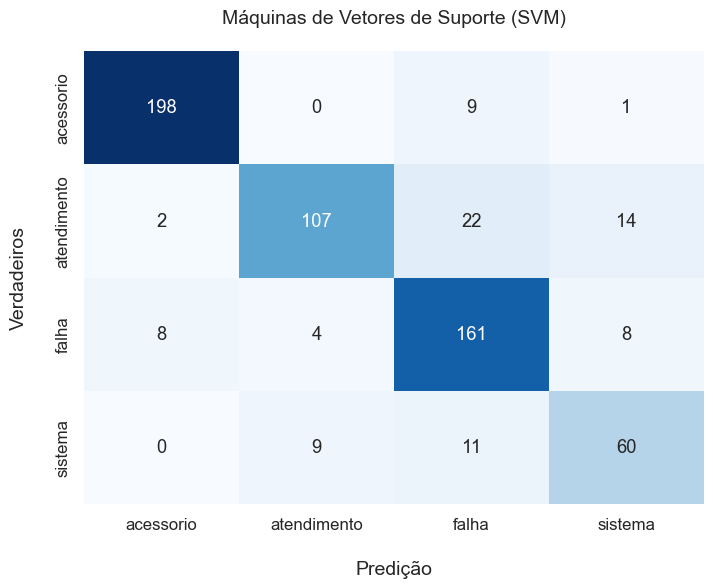

In [35]:
categorias = sorted(y_train.unique())

print('Matrix de Confusão:') 
#print(confusionmatrix)

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
sns.heatmap(confusionmatrix, 
            annot=True,
            fmt='d',
            cbar=False, 
            cmap = 'Blues', 
            xticklabels=categorias, 
            yticklabels=categorias)

plt.xlabel('Predição', fontsize=14, labelpad=20)
plt.ylabel('Verdadeiros', fontsize=14, labelpad=20)
plt.title("Máquinas de Vetores de Suporte (SVM)", fontsize=14, pad=20)

In [36]:
# 4.2 Árvore de Decisão

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Criando o pipeline com o vetorizador e o modelo de Árvore de Decisão
model = DecisionTreeClassifier(criterion='entropy', max_depth=35, random_state=42)
text_classifier = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', model)
])

# Treinando o modelo com os dados de treino
text_classifier.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_predict = text_classifier.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_predict)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.75


In [38]:
#5 Avaliação do Modelo
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Precision
precision = precision_score(y_test, y_predict, average='macro')

# Accuracy
accuracy = accuracy_score(y_test, y_predict)

# Recall
recall = recall_score(y_test, y_predict, average="macro")

# F1 Score
f1score = f1_score(y_test, y_predict, average='macro')

# Classification Score
classificationreport = classification_report(y_test, y_predict) 

# Confusion Matrix
confusionmatrix = confusion_matrix(y_test, y_predict) 

print(f'Precisão: {precision:.2f}')
print(f'Acurácia: {accuracy:.2f}')
print(f'Sensibilidade: {recall:.2f}')
print(f'F1 Score: {f1score:.2f}')

print('Classification Report:') 
print(classificationreport)

Precisão: 0.71
Acurácia: 0.75
Sensibilidade: 0.70
F1 Score: 0.70
Classification Report:
              precision    recall  f1-score   support

   acessorio       0.90      0.92      0.91       208
 atendimento       0.77      0.61      0.68       145
       falha       0.68      0.77      0.72       181
     sistema       0.48      0.50      0.49        80

    accuracy                           0.75       614
   macro avg       0.71      0.70      0.70       614
weighted avg       0.75      0.75      0.74       614



Matrix de Confusão:


Text(0.5, 1.0, 'Árvore de Decisão')

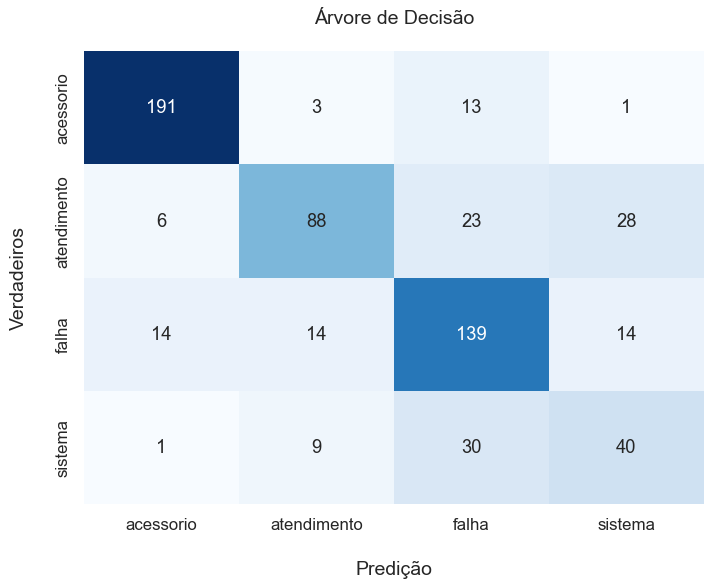

In [40]:
categorias = sorted(y_train.unique())

print('Matrix de Confusão:') 
#print(confusionmatrix)

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
sns.heatmap(confusionmatrix, 
            annot=True,
            fmt='d',
            cbar=False, 
            cmap = 'Blues', 
            xticklabels=categorias, 
            yticklabels=categorias)

plt.xlabel('Predição', fontsize=14, labelpad=20)
plt.ylabel('Verdadeiros', fontsize=14, labelpad=20)
plt.title("Árvore de Decisão", fontsize=14, pad=20)

In [41]:
# 4.3 Naive Bayes

In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Criando o pipeline com o vetorizador e o modelo Naive Bayes
model =  MultinomialNB(alpha=0.2)
text_classifier = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', model)
])

# Treinando o modelo com os dados de treino
text_classifier.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_predict = text_classifier.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_predict)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.80


In [49]:
#5 Avaliação do Modelo
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Precision
precision = precision_score(y_test, y_predict, average='macro')

# Accuracy
accuracy = accuracy_score(y_test, y_predict)

# Recall
recall = recall_score(y_test, y_predict, average="macro")

# F1 Score
f1score = f1_score(y_test, y_predict, average='macro')

# Classification Score
classificationreport = classification_report(y_test, y_predict) 

# Confusion Matrix
confusionmatrix = confusion_matrix(y_test, y_predict) 

print(f'Precisão: {precision:.2f}')
print(f'Acurácia: {accuracy:.2f}')
print(f'Sensibilidade: {recall:.2f}')
print(f'F1 Score: {f1score:.2f}')

print('Classification Report:') 
print(classificationreport)

Precisão: 0.82
Acurácia: 0.80
Sensibilidade: 0.74
F1 Score: 0.75
Classification Report:
              precision    recall  f1-score   support

   acessorio       0.95      0.89      0.92       208
 atendimento       0.91      0.66      0.77       145
       falha       0.65      0.97      0.78       181
     sistema       0.76      0.42      0.54        80

    accuracy                           0.80       614
   macro avg       0.82      0.74      0.75       614
weighted avg       0.83      0.80      0.79       614



Matrix de Confusão:


Text(0.5, 1.0, 'Naive Bayes')

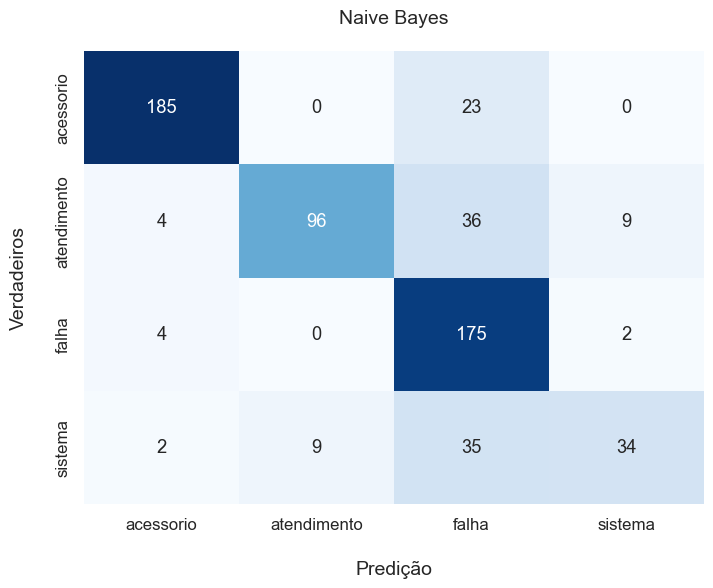

In [50]:
categorias = sorted(y_train.unique())

print('Matrix de Confusão:') 
#print(confusionmatrix)

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
sns.heatmap(confusionmatrix, 
            annot=True,
            fmt='d',
            cbar=False, 
            cmap = 'Blues', 
            xticklabels=categorias, 
            yticklabels=categorias)

plt.xlabel('Predição', fontsize=14, labelpad=20)
plt.ylabel('Verdadeiros', fontsize=14, labelpad=20)
plt.title("Naive Bayes", fontsize=14, pad=20)

In [51]:
# 4.4 Regressão Logística

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Criando o pipeline com o vetorizador e o modelo de Regressão Logística
model = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', multi_class='multinomial')
text_classifier = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', model)
])

# Treinando o modelo com os dados de treino
text_classifier.fit(X_train, y_train)

# Fazendo previsões com os dados de teste
y_predict = text_classifier.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_predict)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.85


In [53]:
#5 Avaliação do Modelo
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Precision
precision = precision_score(y_test, y_predict, average='macro')

# Accuracy
accuracy = accuracy_score(y_test, y_predict)

# Recall
recall = recall_score(y_test, y_predict, average="macro")

# F1 Score
f1score = f1_score(y_test, y_predict, average='macro')

# Classification Score
classificationreport = classification_report(y_test, y_predict) 

# Confusion Matrix
confusionmatrix = confusion_matrix(y_test, y_predict) 

print(f'Precisão: {precision:.2f}')
print(f'Acurácia: {accuracy:.2f}')
print(f'Sensibilidade: {recall:.2f}')
print(f'F1 Score: {f1score:.2f}')

print('Classification Report:') 
print(classificationreport)

Precisão: 0.84
Acurácia: 0.85
Sensibilidade: 0.81
F1 Score: 0.82
Classification Report:
              precision    recall  f1-score   support

   acessorio       0.96      0.93      0.94       208
 atendimento       0.89      0.70      0.78       145
       falha       0.76      0.94      0.84       181
     sistema       0.75      0.68      0.71        80

    accuracy                           0.85       614
   macro avg       0.84      0.81      0.82       614
weighted avg       0.86      0.85      0.84       614



Matrix de Confusão:


Text(0.5, 1.0, 'Regressão Logística')

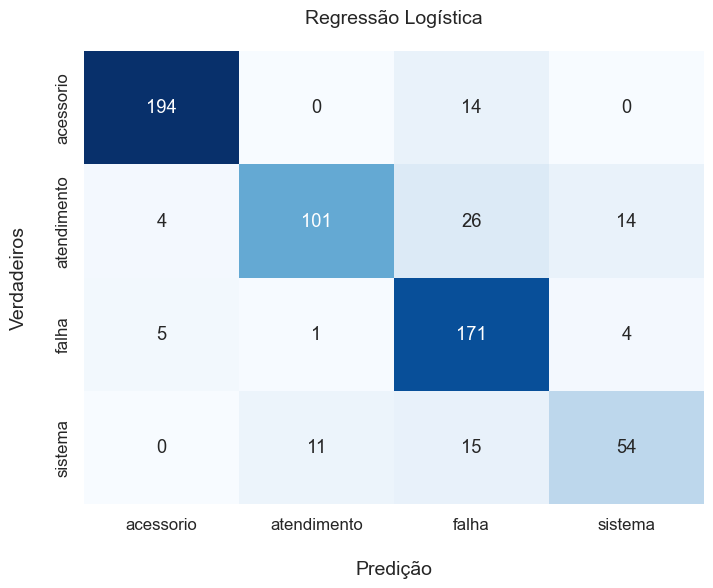

In [54]:
categorias = sorted(y_train.unique())

print('Matrix de Confusão:') 
#print(confusionmatrix)

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
sns.heatmap(confusionmatrix, 
            annot=True,
            fmt='d',
            cbar=False, 
            cmap = 'Blues', 
            xticklabels=categorias, 
            yticklabels=categorias)

plt.xlabel('Predição', fontsize=14, labelpad=20)
plt.ylabel('Verdadeiros', fontsize=14, labelpad=20)
plt.title("Regressão Logística", fontsize=14, pad=20)

In [55]:
# 4.5 Rede Neural Artificial MLP

In [56]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Criando o pipeline com o vetorizador e o modelo de Rede Neural Artificial
text_classifier = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', MLPClassifier(hidden_layer_sizes=(30,)))
])

model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(35,), activation='relu', learning_rate_init=0.001)
text_classifier = Pipeline([
    ('vectorizer', TfidfVectorizer()),
    ('classifier', model)
])

# Treinando o modelo com os dados de treino
text_classifier.fit(X_train, y_train)


# Fazendo previsões com os dados de teste
y_predict = text_classifier.predict(X_test)

# Calculando a acurácia do modelo
accuracy = accuracy_score(y_test, y_predict)
print(f'Acurácia: {accuracy:.2f}')

Acurácia: 0.85


In [57]:
#5 Avaliação do Modelo
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Precision
precision = precision_score(y_test, y_predict, average='macro')

# Accuracy
accuracy = accuracy_score(y_test, y_predict)

# Recall
recall = recall_score(y_test, y_predict, average="macro")

# F1 Score
f1score = f1_score(y_test, y_predict, average='macro')

# Classification Score
classificationreport = classification_report(y_test, y_predict) 

# Confusion Matrix
confusionmatrix = confusion_matrix(y_test, y_predict) 

print(f'Precisão: {precision:.2f}')
print(f'Acurácia: {accuracy:.2f}')
print(f'Sensibilidade: {recall:.2f}')
print(f'F1 Score: {f1score:.2f}')

print('Classification Report:') 
print(classificationreport)

Precisão: 0.83
Acurácia: 0.85
Sensibilidade: 0.81
F1 Score: 0.82
Classification Report:
              precision    recall  f1-score   support

   acessorio       0.95      0.94      0.94       208
 atendimento       0.89      0.72      0.79       145
       falha       0.77      0.92      0.84       181
     sistema       0.72      0.68      0.70        80

    accuracy                           0.85       614
   macro avg       0.83      0.81      0.82       614
weighted avg       0.85      0.85      0.84       614



Matrix de Confusão:


Text(0.5, 1.0, 'Rede Neural Artificial MLP')

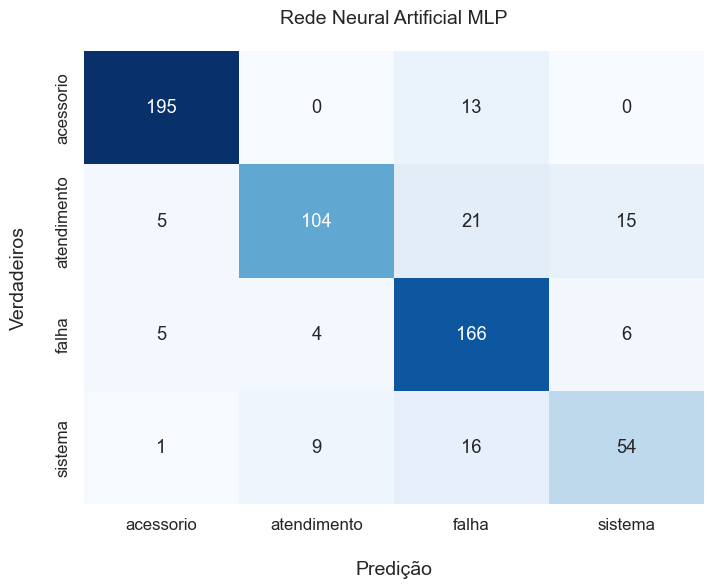

In [58]:
categorias = sorted(y_train.unique())

print('Matrix de Confusão:') 
#print(confusionmatrix)

plt.figure(figsize=(8,6), dpi=100)
sns.set(font_scale = 1.1)
sns.heatmap(confusionmatrix, 
            annot=True,
            fmt='d',
            cbar=False, 
            cmap = 'Blues', 
            xticklabels=categorias, 
            yticklabels=categorias)

plt.xlabel('Predição', fontsize=14, labelpad=20)
plt.ylabel('Verdadeiros', fontsize=14, labelpad=20)
plt.title("Rede Neural Artificial MLP", fontsize=14, pad=20)

In [ ]:
# Esboço para trabalhos futuros: otimização de modelo e análise de erros.

In [ ]:
# 6 Otimização de Modelo

# 6.1 GridSearchCV
from sklearn.model_selection import GridSearchCV

parameters = {'C':[1,8,32],'kernel':['linear','rbf']}

rl_svc = LinearSVC()
rl_svc_grid = GridSearchCV(rl_svc, parameters, cv=5)
rl_svc_grid.fit(X_test_vector, y_train)

print( rl_svc_grid.best_estimator_ )
print( rl_svc_grid.best_params_ )

rl_svc_grid.best_score_

In [ ]:
# 6.1 GridSearchCV
from sklearn.model_selection import GridSearchCV

pipeline = Pipeline([
    ('tfdif', TfidfVectorizer()),
    ('clf', LinearSVC())
])

params = { 'tfdif__binary':[True,False],
          'tfdif__ngram_range':[(1,1),(1,2)],
          'clf__penalty':['l2'],
          'clf__C':[0.05, 1.0, 8.0,],
          'clf__multi_class':['ovr'], 
          'clf__max_iter':[(600),(1000)]
          }


grid = GridSearchCV(pipeline, params, cv=5)

grid.get_params().keys()



In [ ]:
grid.fit(X_train, y_train)

print( grid.best_estimator_ )
print( grid.best_params_ )
print( grid.best_score_ )

In [ ]:
# comparando as linhas que o modelo errou

dataframe = []
dataframe = df
y_pred_series = pd.Series(y_predict, index=y_test.index)
dataframe['y_predict'] = pd.Series(y_pred_series)
dataframe['error'] = dataframe['categoria'] != dataframe['y_predict'] 
complaints_df_test = dataframe[dataframe['y_predict'].notnull()]

# save the files 
complaints_df_test.to_excel('C:\\Users\\assis\\OneDrive\\Documentos\\DS\\Python\\complaints_df_test.xlsx')

#dataframe['cluster_name'] == dataframe['y_predict'] 

In [ ]:
#text = ['A apple me recusou o reembolso de um aplicativo que dizia só fazer a cobraça após 7 dias, porque seria um teste grátis. Foi cobrado 129 reais imediatamente no cartão que esta salvo no incloud, pedi o reembolso achando que foi um erro deles e foi negado,a apple me decepcionou, exigo resoluções imediatas porque vou pagar por uma coisa que não irei utilizar!']
#text = " ".join(text)

#type(text)